In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import linear_model

## Ground Cricket Chirps

In _The Song of Insects_ (1948) by George W. Pierce, Pierce mechanically measured the frequency (the number of wing vibrations per second) of chirps (or pulses of sound) made by a striped ground cricket, at various ground temperatures.  Since crickets are ectotherms (cold-blooded), the rate of their physiological processes and their overall metabolism are influenced by temperature.  Consequently, there is reason to believe that temperature would have a profound effect on aspects of their behavior, such as chirp frequency.

In general, it was found that crickets did not sing at temperatures colder than 60º F. or warmer than 100º F.

In [2]:
ground_cricket_data = {"Chirps_Second": [20.0, 16.0, 19.8, 18.4, 17.1, 15.5, 14.7,
                                         15.7, 15.4, 16.3, 15.0, 17.2, 16.0, 17.0,
                                         14.4],
                       "Ground_Temperature": [88.6, 71.6, 93.3, 84.3, 80.6, 75.2, 69.7,
                                              71.6, 69.4, 83.3, 79.6, 82.6, 80.6, 83.5,
                                              76.3]}
df = pd.DataFrame(ground_cricket_data)

In [3]:
df

,Chirps_Second,Ground_Temperature
0,20.0,88.6
1,16.0,71.6
2,19.8,93.3
3,18.4,84.3
4,17.1,80.6
5,15.5,75.2
6,14.7,69.7
7,15.7,71.6
8,15.4,69.4
9,16.3,83.3


In [4]:
df.describe()

,Chirps_Second,Ground_Temperature
count,15.000000,15.000000
mean,16.566667,79.346667
std,1.712837,7.020467
min,14.400000,69.400000
25%,15.450000,73.400000
50%,16.000000,80.600000
75%,17.150000,83.400000
max,20.000000,93.300000


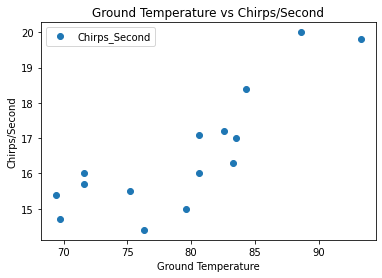

In [5]:
df.plot(x = 'Ground_Temperature', y = 'Chirps_Second', style = 'o')
plt.title('Ground Temperature vs Chirps/Second')
plt.xlabel('Ground Temperature')
plt.ylabel('Chirps/Second')
plt.show()

In [6]:
df.corr()

,Chirps_Second,Ground_Temperature
Chirps_Second,1.000000,0.832042
Ground_Temperature,0.832042,1.000000


There is positive linear relationship between the Chirps_Second and Ground Temperature.Therefore we can go ahead and build linear regression model and there is no need of Transformation

In [7]:
x = df.loc[:,['Ground_Temperature']].values
y = df.loc[:,'Chirps_Second'].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=1)

In [8]:
x_train.shape, x_test.shape

((12, 1), (3, 1))

### Modelling

In [9]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [10]:
print(regressor.intercept_)

-0.3096122918821571


In [11]:
print(regressor.coef_)

[0.21088052]


In [12]:
y_pred = regressor.predict(x_test) 
y_pred

array([17.46761536, 14.78943279, 14.3887598 ])

In [13]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1

,Actual,Predicted
0,18.4,17.467615
1,15.7,14.789433
2,14.7,14.388760


### Metrics

In [14]:
from sklearn import metrics 
print('R2- SCORE:', metrics.r2_score(y_test,y_pred))

R2- SCORE: 0.7549575666351982


In [15]:
regressor.predict([[95]])

array([19.7240369])

 At 95˚F, our approximation of chirps/sec is: 19.6921

In [16]:
(18 - regressor.intercept_) / regressor.coef_

array([86.82457953])

With an observation of 18 chirps/sec, we expect a ground temp of 86.21˚F 

## Brain vs. Body Weight

In the file `brain_body.txt`, the average brain and body weight for a number of mammal species are recorded. Load this data into a Pandas data frame.

In [17]:
df = pd.read_fwf("brain_body.txt")

In [18]:
df.head()

,Brain,Body
0,3.385,44.5
1,0.480,15.5
2,1.350,8.1
3,465.000,423.0
4,36.330,119.5


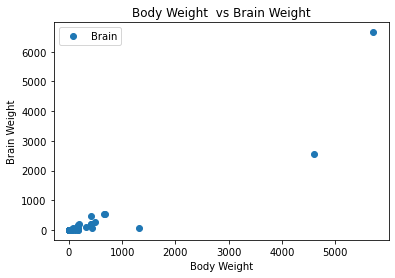

In [19]:
df.plot(x = 'Body', y = 'Brain', style = 'o')
plt.title('Body Weight  vs Brain Weight')
plt.xlabel('Body Weight')
plt.ylabel('Brain Weight')
plt.show()

In [20]:
df.corr()

,Brain,Body
Brain,1.000000,0.934164
Body,0.934164,1.000000


In [21]:
x = df.loc[:,['Body']].values
y = df.loc[:,'Brain'].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)

In [22]:
x_train.shape, x_test.shape

((46, 1), (16, 1))

In [23]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [24]:
print(regressor.intercept_)

-71.57018864698333


In [25]:
print(regressor.coef_)

[0.90677694]


In [26]:
y_pred = regressor.predict(x_test) 
y_pred

array([522.36870978, -70.48205631, -71.20747787, -48.35669888,
       -64.2252954 , 372.75051399, -69.30324629, -36.02453244,
       -20.79067977,  70.79379159, -60.59818762, -71.34349441,
       -55.70159212,  91.6496613 , -69.39392398, 311.99645873])

In [27]:
print('R2- SCORE: ', regressor.score(x, y))

R2- SCORE:  0.8724128730940551


## Salary Discrimination

The file `salary.txt` contains data for 52 tenure-track professors at a small Midwestern college. This data was used in legal proceedings in the 1980s about discrimination against women in salary.

The data in the file, by column:

1. Sex. 1 for female, 0 for male.
2. Rank. 1 for assistant professor, 2 for associate professor, 3 for full professor.
3. Year. Number of years in current rank.
4. Degree. Highest degree. 1 for doctorate, 0 for master's.
5. YSdeg. Years since highest degree was earned.
6. Salary. Salary/year in dollars.

In [29]:
df = pd.read_fwf("salary.txt", header=None, 
                 names=["Sex", "Rank", "Year", "Degree", "YSdeg", "Salary"])

In [30]:
df.head()

,Sex,Rank,Year,Degree,YSdeg,Salary
0,0,3,25,1,35,36350
1,0,3,13,1,22,35350
2,0,3,10,1,23,28200
3,1,3,7,1,27,26775
4,0,3,19,0,30,33696


In [31]:
df.shape

(52, 6)

In [32]:
c_1=df["Sex"]   #Labeling the columns in order to find the correlation between the columns
c_2=df["Rank"]
c_3=df["Year"]
c_4=df["Degree"]
c_5=df["YSdeg"]
c_6=df["Salary"]

### Feature:Sex

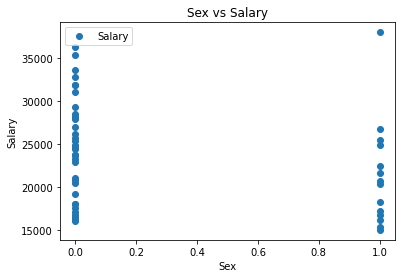

In [35]:
df.plot(x = 'Sex', y = 'Salary', style = 'o')
plt.title('Sex vs Salary')
plt.xlabel('Sex')
plt.ylabel('Salary')
plt.show()

In [36]:
 print('The correlation Between Sex and Salary is:',c_1.corr(c_6)) # to find the correlation of sex and salary

The correlation Between Sex and Salary is: -0.2527823685166354


In [37]:
x = df.loc[:,['Sex']].values
y = df.loc[:,'Salary'].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)

In [38]:
x_train.shape, x_test.shape

((39, 1), (13, 1))

In [39]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [40]:
print('R2- SCORE Between Sex and Salary : ', regressor.score(x, y))

R2- SCORE Between Sex and Salary :  0.03872338529009289


### Feature:Rank

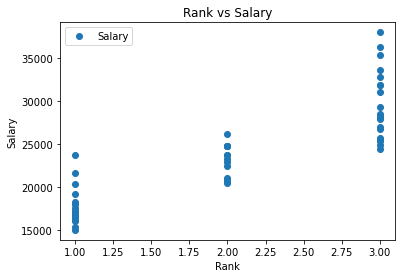

In [42]:
df.plot(x = 'Rank', y = 'Salary', style = 'o')
plt.title('Rank vs Salary')
plt.xlabel('Rank')
plt.ylabel('Salary')
plt.show()

In [43]:
print('The correlation Between Rank and Salary is:',c_2.corr(c_6))

The correlation Between Rank and Salary is: 0.8674883595342725


In [44]:
x = df.loc[:,['Rank']].values
y = df.loc[:,'Salary'].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)

In [45]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [46]:
print('R2- SCORE Between Rank and Salary : ', regressor.score(x, y))

R2- SCORE Between Rank and Salary :  0.741811821198002


### Feature:Year

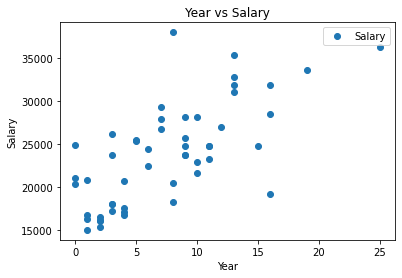

In [47]:
df.plot(x = 'Year', y = 'Salary', style = 'o')
plt.title('Year vs Salary')
plt.xlabel('Year')
plt.ylabel('Salary')
plt.show()

In [48]:
print('The correlation Between Year and Salary is:',c_3.corr(c_6))

The correlation Between Year and Salary is: 0.7006689851629057


In [49]:
x = df.loc[:,['Year']].values
y = df.loc[:,'Salary'].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)

In [50]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [51]:
print('R2- SCORE Between Year and Salary : ', regressor.score(x, y))

R2- SCORE Between Year and Salary :  0.4872580421403433


### Feature:Degree

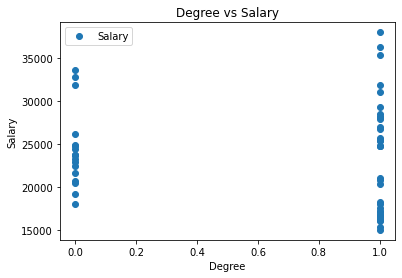

In [52]:
df.plot(x = 'Degree', y = 'Salary', style = 'o')
plt.title('Degree vs Salary')
plt.xlabel('Degree')
plt.ylabel('Salary')
plt.show()

In [53]:
print('The correlation Between Degree and Salary is:',c_4.corr(c_6))

The correlation Between Degree and Salary is: -0.0697257555337208


In [54]:
x = df.loc[:,['Degree']].values
y = df.loc[:,'Salary'].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)

In [55]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [56]:
print('R2- SCORE Between Degree and Salary : ', regressor.score(x, y))

R2- SCORE Between Degree and Salary :  -0.008906608621467083


### Feature:YSdeg

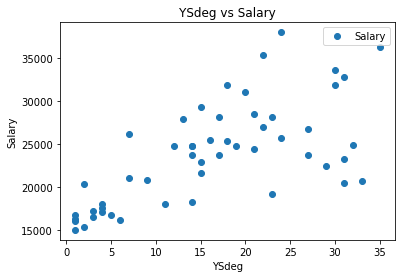

In [57]:
df.plot(x = 'YSdeg', y = 'Salary', style = 'o')
plt.title('YSdeg vs Salary')
plt.xlabel('YSdeg')
plt.ylabel('Salary')
plt.show()

In [58]:
print('The correlation Between YSdeg and Salary is:',c_5.corr(c_6))

The correlation Between YSdeg and Salary is: 0.6748541580101605


In [59]:
x = df.loc[:,['YSdeg']].values
y = df.loc[:,'Salary'].values
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.25, random_state=1)

In [60]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [61]:
print('R2- SCORE Between YSdeg and Salary : ', regressor.score(x, y))

R2- SCORE Between YSdeg and Salary :  0.4093302528746209


### The Feature which has the best R2-SCORE is "Rank" which has a R2- SCORE of 0.74181

### There is no Salary discrimination by Sex  because it has a low R2- SCORE of 0.038723 an there is no correlation with Sex